# Online ads

In this problem set we analyse the relationship between online ads and purchase behavior. In particular, we want to classify which online users are likely to purchase a certain product after being exposed to an online ad.  

## Data preparation

In [29]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/purchase.csv")
df

Unnamed: 0   User ID  Gender  Age  EstimatedSalary  Purchased
0             1  15624510    Male   19            19000          0
1             2  15810944    Male   35            20000          0
2             3  15668575  Female   26            43000          0
3             4  15603246  Female   27            57000          0
4             5  15804002    Male   19            76000          0
..          ...       ...     ...  ...              ...        ...
395         396  15691863  Female   46            41000          1
396         397  15706071    Male   51            23000          1
397         398  15654296  Female   50            20000          1
398         399  15755018    Male   36            33000          0
399         400  15594041  Female   49            36000          1

[400 rows x 6 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       400 non-null    int64 
 1   User ID          400 non-null    int64 
 2   Gender           400 non-null    object
 3   Age              400 non-null    int64 
 4   EstimatedSalary  400 non-null    int64 
 5   Purchased        400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [31]:
# make dummy variable
df['male'] = pd.get_dummies(df['Gender'], drop_first = True)
# drop irrelevant columns
df.drop(columns= ['Unnamed: 0', 'User ID', 'Gender'], inplace = True)

In [32]:
# inspect outcome variable
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [33]:
# prepara data for scikit learn 
X = df.drop(columns=['Purchased'])
y = df.Purchased

In [34]:
# make data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

In [35]:
# create new training dataset for data exploration
train_dataset = pd.DataFrame(X_train).copy()
train_dataset['Purchased'] = pd.DataFrame(y_train)

train_dataset

Age  EstimatedSalary  male  Purchased
177   25            22000     1          0
105   21            72000     1          0
5     27            58000     1          0
288   41            79000     1          0
279   50            36000     0          1
..   ...              ...   ...        ...
230   35           147000     0          1
98    35            73000     1          0
322   41            52000     1          0
382   44           139000     0          1
365   59            29000     0          1

[280 rows x 4 columns]

## Exploratory data analysis (EDA)

In [36]:
train_dataset.groupby(by=['Purchased']).describe().T

Purchased                          0              1
Age             count     180.000000     100.000000
                mean       32.672222      46.090000
                std         8.176018       8.589511
                min        18.000000      27.000000
                25%        26.000000      39.000000
                50%        33.500000      47.000000
                75%        39.000000      53.000000
                max        59.000000      60.000000
EstimatedSalary count     180.000000     100.000000
                mean    59788.888889   85460.000000
                std     22884.697356   41858.207020
                min     15000.000000   20000.000000
                25%     46500.000000   38750.000000
                50%     60000.000000   92000.000000
                75%     76250.000000  122000.000000
                max    134000.000000  150000.000000
male            count     180.000000     100.000000
                mean        0.527778       0.420000
                std         0.500620       0.496045
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         1.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000

Purchasers are (on average) _______ and earn a __________ estimated salary than non-purchasers. 

Visualization of differences:

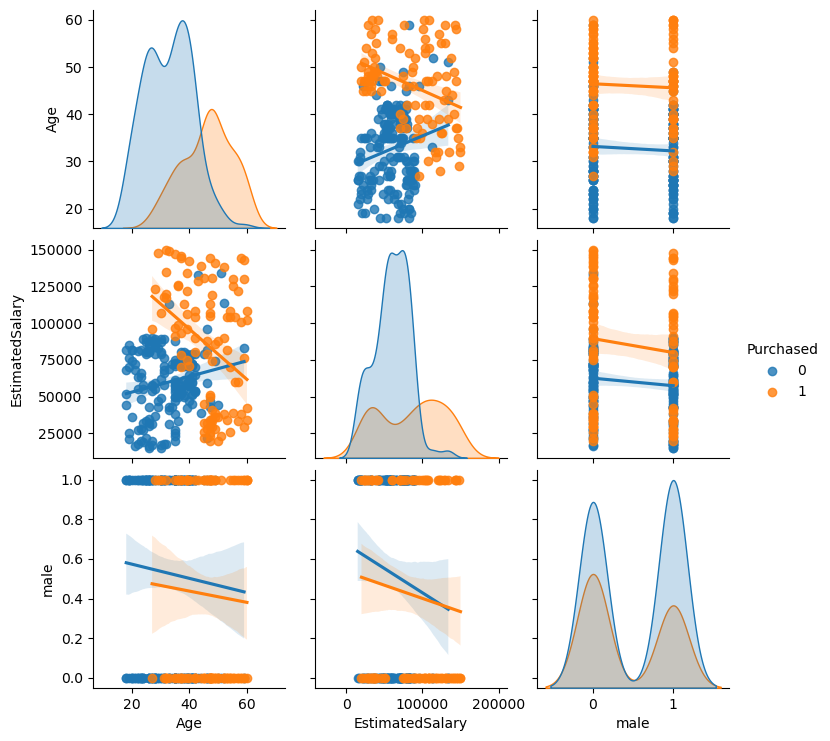

In [37]:
import seaborn as sns

sns.pairplot(hue='Purchased', kind="reg", diag_kind="kde", data=train_dataset);

Inspect (linear) relationships between variables with correlation (pearson's correlation coefficient)

In [38]:
df.corr().round(2)

Age  EstimatedSalary  Purchased  male
Age              1.00             0.16       0.62 -0.07
EstimatedSalary  0.16             1.00       0.36 -0.06
Purchased        0.62             0.36       1.00 -0.04
male            -0.07            -0.06      -0.04  1.00

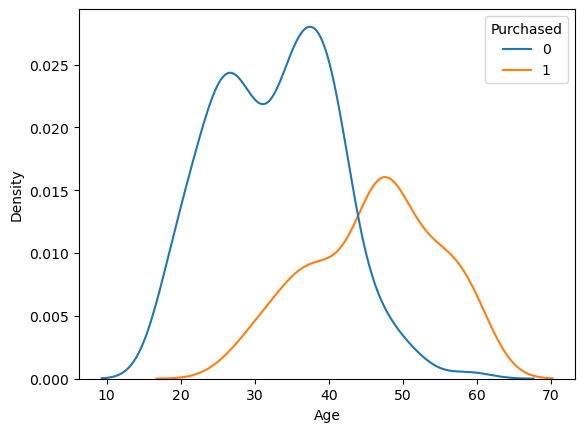

In [39]:
sns.kdeplot(hue="Purchased", x='Age', data=train_dataset);

Purchasers seem to be _________ than non-purchaser.

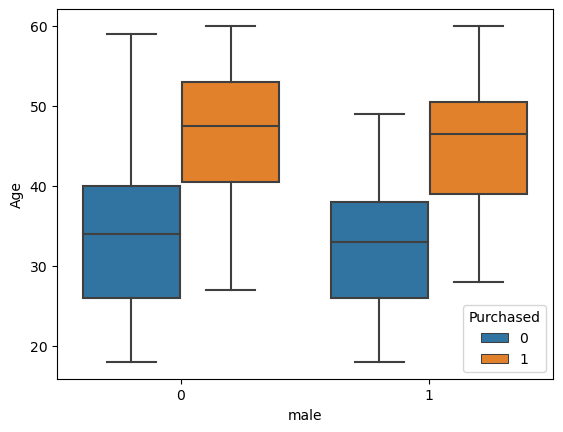

In [40]:
sns.boxplot(x="male", y="Age", hue="Purchased", data=train_dataset);

There are __________ differences regarding gender.

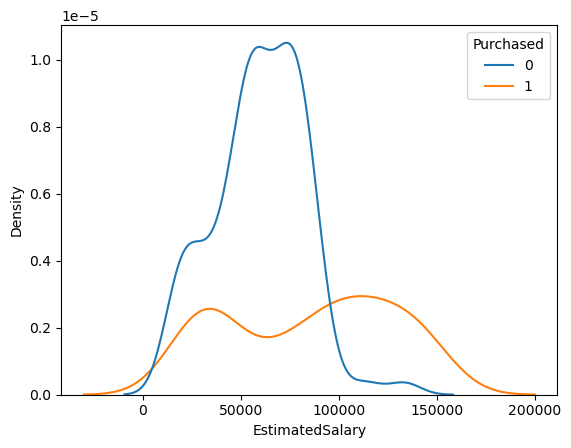

In [41]:
sns.kdeplot(hue="Purchased", x='EstimatedSalary', data=train_dataset); 

Purchaser earn a ______________ estimated salary.

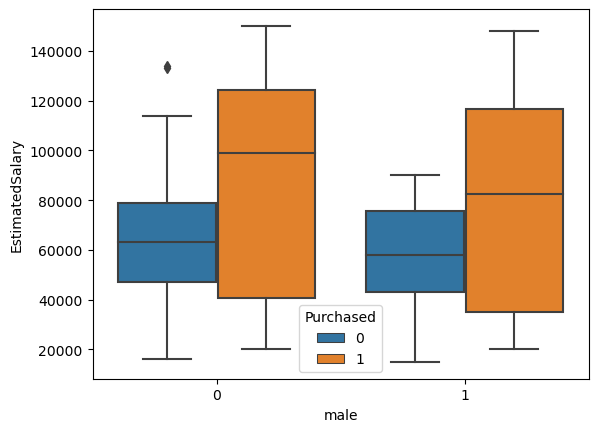

In [42]:
sns.boxplot(x="male", y="EstimatedSalary", hue="Purchased", data=train_dataset);

Insight: there are ___________ differences between males and females (regarding purchase behavior, age and estimated salary)

## Model

Next, we will fit a logistic regression model. In particular, we use a model that has built-in cross-validation capabilities to automatically select the best hyper-parameter for our model.

We only use our most promising predictor variables `Age` and `EstimatedSalary` for our model.

In [43]:
# only use meaningful predictors
features_model = ['Age', 'EstimatedSalary']

X_train = X_train[features_model] 
X_test = X_test[features_model]

In [44]:
from sklearn.linear_model import LogisticRegressionCV

# model
clf = LogisticRegressionCV()

# fit model to data
clf.fit(X_train, y_train)

# prediction
y_pred = clf.predict(X_test)

## Classification metrics

In [45]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.825

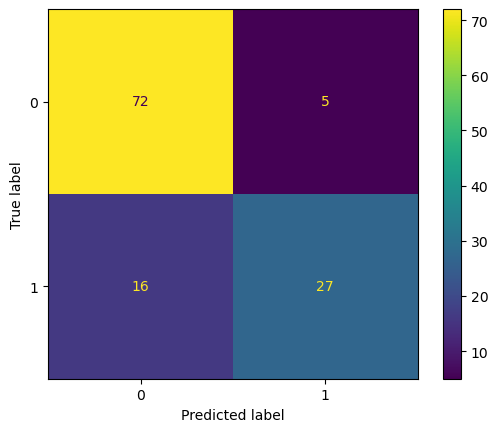

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Not purchased', 'Purchased']))

               precision    recall  f1-score   support

Not purchased       0.82      0.94      0.87        77
    Purchased       0.84      0.63      0.72        43

     accuracy                           0.82       120
    macro avg       0.83      0.78      0.80       120
 weighted avg       0.83      0.82      0.82       120



``macro``: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

``weighted``: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance.

Note that recall is also sometimes called sensitivity or true positive rate.

* High scores for both *precision* and *recall* show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

* The importance of precision vs recall depends on the use case at hand (and the costs associated with missclassification). 

* A system with *high recall* but *low precision* returns many results, but most of its predicted labels are incorrect when compared to the training labels. 

* A system with *high precision* but *low recall* is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. 
  
* An ideal system with high precision and high recall will return many results, with most results labeled correctly. 

The unweighted recall of our model is _____  

The unweighted precision of our model is _____  

### ROC Curve

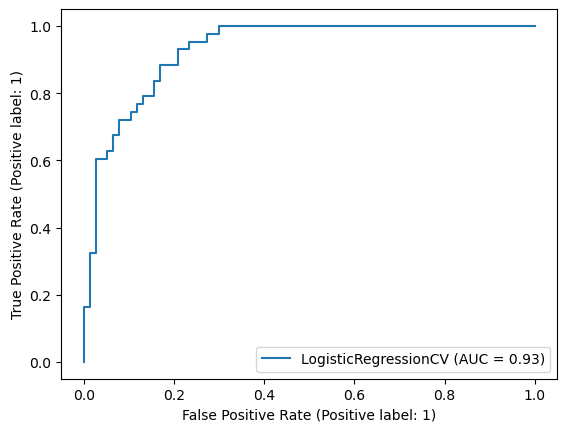

In [48]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test) 

### AUC Score


In [49]:
from sklearn.metrics import roc_auc_score

y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.9311386288130474